# Some calculations with logistic growth

In [ ]:
import handcalcs.render
from sympy import * #symbolic algebra package
import numpy as np #numerical python packagee
import matplotlib.pyplot as plt #matplotlib is a plotting package
%matplotlib inline # without this plots are popouts

## Playing around with handcalcs

In [5]:
y, x = symbols('y x')

In [6]:
%%render sympy
y = x**2


<IPython.core.display.Latex object>

In [7]:
y

f_x = diff(x**2,x)

In [8]:
%%render 
f_x


<IPython.core.display.Latex object>

## Some numerical examples

In [9]:
# Constants 
r = 1.8 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
x[0] = x0 # pass initial value to vector
for i in range(0,len(x)-1):
     x[i+1] = x0 + r*x[i]*(1-x[i]/K)
print(x) 


[ 1.          2.782       5.86828857 10.94305683 18.54199342 28.1870888
 37.43554429 43.15842015 45.15747013 45.57789828]


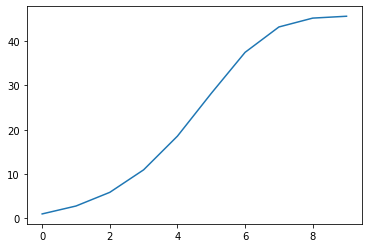

In [10]:
plt.plot(x)

# What does this look like if time is continuous

Use the previous code but modify it slightly

To make time continuous we will usse a simple numerical technique called Euler's method

Discrete-time dynamics $ x_{t+1} - x_{t} = r x_{t} (1 - \frac{x_t}{K})$ This is called a difference equation


Continuous-time dynamics $\frac{dx}{dt} = r x(t)(1-\frac{x(t)}{K})$ This is called a differential equation

[ 9.9 10.9 11.9 12.9 13.9 14.9 15.9 16.9 17.9] [ 1.          2.9602      6.68769288 13.35607222 23.91300663 37.02548178
 47.16690516 50.34107676 50.4976966 ]


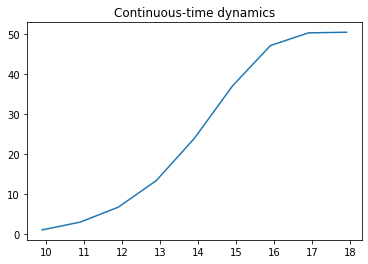

In [38]:
# Constants 
r = 0.2 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
n = 10 # note this should be (b - x0)/h so h = (b - x0)/n
#initialize values
x = np.zeros(n)  # vector of zeroes
t = np.zeros(n)
x[0] = x0 # pass initial value to vector
t[0] = 1
b = 100 # upper bound on the interval for x

h = (b - x0)/n

for i in range(0,n-1):
     t[i] = i + h #tiemstep + or * can be used
     x[i+1] = x0 + h*(r*x[i]*(1-x[i]/K))
print(t[0:n - 1],x[0:n - 1]) #print values
plt.plot(t[0:n - 1],x[0:n - 1])
plt.title('Continuous-time dynamics')
plt.show()

# Analytical solution



We can solve these exactly without using numbers, we will use the Python SymPy module to do this.

We first define an unknow function for the stock $x(t)$ let's call this $f$ (for fish or for function, 
so as not to confuse it with $x$ above or further below) as a function of time that we wish to solve for.

We will make us of symbolic algebra (math with symbols) rahtner than numerical mathematics (math with numbers) to do our analysis.

In [172]:
f, t, r, K = symbols('f t r K') #first define symbols
f = Function('f') #defien the symbol f as a function
ode = Eq(diff(f(t), t), r*f(t)*(1 - f(t)/K)) # ode = ordinary differential equation, define our growth equation
ode

Eq(Derivative(f(t), t), r*(1 - f(t)/K)*f(t))

In [173]:
sol = dsolve(ode, f(t))  # solve the equation
sol

Eq(f(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

This is the solution! It gives us a formula for the stock of fish $f(t) = x(t)$ at every point in time. to calculate the stock at a point in time subsitute in the time $t$, the growth rate of the stock and the carrying capcity $K$.
We will see later that the carrying capacity of the stock $K$ is jus tthe unfished biomass in steady-state (when the stock is constant through time). 

To calculate the stock (quantity of fish) we also need to know $C_1$. How do we find this number?





To find $C_1$ set $f(t) = x(0) = x0$ and $t= 0$ and solve for $C_1$


In [174]:
t = Symbol('t')
x0 = Symbol('x0')
eq1 = Eq(sol.rhs.subs(t,0),x0) 
eq1

Eq(K*exp(C1*K)/(exp(C1*K) - 1), x0)

In [175]:
C1, K, x0 = symbols('C1 K x0')
C2 = solve(eq1,C1)
C2


[log(x0/(-K + x0))/K]

In [177]:
x = Symbol('x(t)')
eq3 = Eq(sol.rhs.subs(C1,C2),x)
logequation = simplify(eq3.subs({Symbol('C1'): C2[0]}) ) #substitute C! and simplify
logequation

Eq(x(t), K*x0*exp(r*t)/(K + x0*exp(r*t) - x0))

## Exercise

Using the values from the numerical solution above for  $x_0$ and $r$ and $K$ plot this equation. 
Comapre the results using Matplotlib.pyplot (we could also plit if using SymPy but Matplotlib is more standard).


## Beverton- Holt Stock Recruitment Equation

The Beverton-Holt equation relates the stock to the recruits (survivors from an earlier point in time. there are both discrete-time and continuious-time versions of this equation, however, the discrete-time version is more common.

SPC in its stock assessment models uses a version of this model that additionally includes age and length of fish. In fisheries economic we keep the biology simple because we add additional complexity on the economic side, so we need to trade-off biological complexit and economic complexity of our models.

We will now show the link between this equation and the logistic equation.

Start with the solution of the logistic equation above.

In [114]:
GBHE = collect(logequation.rhs,x0)
GBHE

K*x0*exp(r*t)/(K + x0*(exp(r*t) - 1))

In [136]:
B = Symbol('B')
v = Symbol('v')
GBHE1 = GBHE.subs(x0,B)
GBHE1

B*K*exp(r*t)/(B*(exp(r*t) - 1) + K)

Divide the denominator (bottom of fraction) and the numerator (top of fraction) by $\frac{1}{K}$ and replace $e^{rt}$ with $\alpha$ and $(e^{rt} - 1)/K$ with $\beta$ we get

$R(B) = \frac{\alpha B}{1 + \beta B}$ is the usual Beverton-Holt recuitment function. 



## Steepness


Steepness is the ratio of recruitment that occurs when biomass is at 20% of the unfished biomass, in other words at the limit reference point, to recuitment at the unfished level of biomass.

so $R(0.2 B_0)$ to $R(B_0)$. 

So $R_0 = R(B_0) =\frac{\alpha B_0}{1 + \beta B_0}$

This can also be written as (divide numerator and denominator by $\frac{1}{\alpha}$)

$R_0 = \frac{B_0}{\frac{1}{\alpha} + \frac{\beta}{\alpha} B_0}$


set $\tilde{\alpha} = \frac{1}{\alpha}$ and $\tilde{\beta} = \frac{\beta}{\alpha}$, so

$R_0 = \frac{B_0}{\tilde{\alpha} + \tilde{\beta} B_0}$ this version of the Beverton-Holt relationship is also used soemtimes.


Steepness $h$ is then determiend by

$h R_0 = \frac{0.2 B_0}{\tilde{\alpha} + 0.2 \tilde{\beta} B_0)}$

So let's use SymPy to solve for $h$


In [170]:
R0, a, b, B0, h = symbols('R0 a b B0 h') #deine symbols

sol2 = solve({R0 - B0/(a +b*B0),h*R0 - 0.2*B0/(a + 0.2*b*B0)},{a,b}) #solve for parameters 

sol2

{a: -0.25*B0*(h - 1.0)/(R0*h), b: 0.25*(5.0*h - 1.0)/(R0*h)}

Which show that the key parasmeters of the stock recruitment relationship are related by steepness $h$. So SPC estimates recuits and chooses $h$ to eastimate these eparameters. 



## Add fishing

Use the following catch equation to modify the computer code above to incorporate fishing into our model:

$Y = q X E$

where$$Y$$is catch, $$q$$ is the catchability and $$X$$ is the stock and $$E$$ fishing effort.

Produce a graph and vary fishing effort to see how the graph changes. Assume fishing effort is some cosntant.


The following is a discrete time model of stock dynamics with constant effort.

In [223]:
# Constants 
r = 1 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
q = 0.01 #catchability
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
E = np.zeros(10)

x[0] = x0 # pass initial value to vector

for i in range(0,len(x)-1):
     E[i] = 0.0000
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K) # - q*x[i]*E[i]
print(i,x) 


8 [ 1.          1.99        3.940399    7.72553056 14.85422289 27.5019664
 47.44035125 72.37483323 92.36850161 99.41760232]


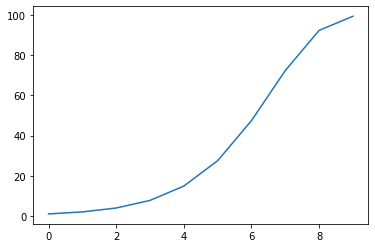

In [224]:
plt.plot(x)

## Exercise

How might one change the model to allow different effort levels in each time period?
Let's discuss the code and try and modify it.


# Addding economics

Now we need to add economics how should we do that?


Rent is not the same as profit. Consider a fleet of vessels. That can be ranked in terms of who are the best at catching fish. Assume the worst vessel starts fishing and then another vessel that is better at catching fish starts fishing. At the prevailing market price (no matter what it is the second better vessel can make more money than the first vessel, bbecause it catches the same amount as the first vessel at lower cost, if the first vessel is just breaking even, then the aditional profit being made by the second vessel is the rent. If a third vessel enters the fishery, then the rent is now the sum of all the additional profits of the more efficient vessels in the fishery.
This is the idea of Ricardian rent (which comes from Agriculture applied to fisheries) first introduced by [Jens Warming in 1911](https://tidsskrift.dk/nationaloekonomisktidsskrift/article/download/59023/81346?inline=1) [Who was Jens Warming?](https://sv.wikipedia.org/wiki/Jens_Warming). 





